In [1]:
import tweepy
from textblob import TextBlob
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
#Twitter API credentials
API_key='pdPr7inHFxoFNqdSa8YU5fAM3'
API_secret_key='RLHUEmmO2Xs6cRVgFr6GBvlHCpT7nmtIKcLIPn2RWpHLirs6eH'
access_token='873028767861530626-Utyv8V633s7HrUf2rOoPBwu2ks70PCG'
access_token_secret='WVbbtPzu8BEre61U4fbeYzoJfZxDwvYd0zkbiQSqwcHsi'

In [5]:
#creating authentication object
auth=tweepy.OAuthHandler(API_key,API_secret_key)
auth.set_access_token(access_token,access_token_secret)
#creating API object
api=tweepy.API(auth)

In [6]:
public_tweets=api.search(q='virat kohli',count=100)

In [7]:
for tweet in public_tweets:
    print(tweet.text + '\n')

RT @TrendVirat: Wisden's 'London has fallen' poster featuring Virat Kohli 🔥😎
and Team India

#ViratKohli • @imVkohli • #KingKohli https://t…

@MainWahiHu @Akshay_Skipper @SRKsABHI @The_EvilGuy @Tinyyhunter @Pythonfamily @Jitendr63761289 @KRITIS__VIRAT… https://t.co/zquJO26qWJ

RT @TrollvkH: 12.5L Rupees worth Questions regarding Virat Kohli in EMK and KBC shows respectively!

#ViratKohli || @imVkohli https://t.co/…

RT @TrollvkH: 12.5L Rupees worth Questions regarding Virat Kohli in EMK and KBC shows respectively!

#ViratKohli || @imVkohli https://t.co/…

RT @ZeeNewsEnglish: Virat Kohli could be 'removed as RCB captain mid-way' in IPL 2021: Former India player

#ViratKohli #RCB #IPL2021 
 htt…

RT @man4_cricket: Virat Kohli's RCB Blue Jersey with his autographed &amp; Current highest bid - 200,000. (Source - Fankind)

RT @man4_cricket: Virat Kohli is practicing batting and Mohammed Azharuddeen is wicketkeeping at the moment. #RCB https://t.co/vMVd2eRWHP

@imVkohli always follower. Main

In [9]:
# creating dataframe for tweets
df = pd.DataFrame([tweet.text for tweet in public_tweets],columns=['Tweets'])
df

,Tweets
0,"1st Test: After 74.0 Ov, India 171/3. Virat Ko..."
1,RT @AdamBurnett09: Most balls faced in Test cr...
2,RT @mufaddal_vohra: Australian media came up w...
3,RT @CricCrazyJohns: Virat Kohli as Test captai...
4,RT @StanVirat: Quote your favorite memory of v...
...,...
95,RT @CricCrazyJohns: Virat Kohli was the first ...
96,महेंद्रसिंग धोनीलाही टाकले मागे\n#ViratKohli \...
97,RT @beastieboy07: For all the understandable l...
98,RT @IExpressSports: Virat Kohli stays strong a...


In [10]:
df.describe()

,Tweets
count,100
unique,63
top,RT @beastieboy07: For all the understandable l...
freq,8


In [11]:
# function to clean the tweets
def clean(tweet):
    tweet=re.sub(r'RT',' ',tweet)
    tweet=re.sub(r'@[^\s]+',' ',tweet)
    tweet=re.sub(r'#','',tweet)
    tweet=re.sub(r'[0-9]',' ',tweet)
    tweet=re.sub(r'https?:\/\/\S+','',tweet)
    return(tweet)

In [12]:
df['Tweets']= df['Tweets'].apply(clean)
df

,Tweets
0,"st Test: After . Ov, India / . Virat Ko..."
1,Most balls faced in Test cricket v Aus in ...
2,Australian media came up with bromance bet...
3,Virat Kohli as Test captain averages . ...
4,Quote your favorite memory of virat kohli ...
...,...
95,Virat Kohli was the first Indian to score ...
96,महेंद्रसिंग धोनीलाही टाकले मागे\nViratKohli \n...
97,For all the understandable love for Pujara...
98,Virat Kohli stays strong after his right-h...


In [30]:
# checking polarity of tweets
df['Polarity']=df['Tweets'].apply(lambda tweet:TextBlob(tweet).sentiment.polarity)

In [1]:
# checking subjectivity of tweets
df['Subjectivity']=df['Tweets'].apply(lambda tweet:TextBlob(tweet).sentiment.subjectivity) 

NameError: name 'df' is not defined

In [32]:
df

,Tweets,Polarity,Subjectivity,Analysis
0,"st Test: After . Ov, India / . Virat Ko...",0.000000,0.000000,Neutral
1,Most balls faced in Test cricket v Aus in ...,0.125000,0.375000,Positive
2,Australian media came up with bromance bet...,0.000000,0.000000,Neutral
3,Virat Kohli as Test captain averages . ...,0.000000,0.000000,Neutral
4,Quote your favorite memory of virat kohli ...,0.500000,1.000000,Positive
...,...,...,...,...
95,Virat Kohli was the first Indian to score ...,0.133333,0.322222,Positive
96,महेंद्रसिंग धोनीलाही टाकले मागे\nViratKohli \n...,0.000000,0.000000,Neutral
97,For all the understandable love for Pujara...,0.550000,0.750000,Positive
98,Virat Kohli stays strong after his right-h...,0.433333,0.733333,Positive


In [19]:
# function to check whether the tweet is positive negative or neutral
def sentiment(row):
    if(row['Polarity']>0):
        return "Positive"
    elif(row['Polarity']<0):
        return "Negative"
    else:
        return "Neutral"

In [20]:
df['Analysis']=df.apply(sentiment,axis=1)
df

,Tweets,Polarity,Subjectivity,Analysis
0,"st Test: After . Ov, India / . Virat Ko...",0.000000,0.000000,Neutral
1,Most balls faced in Test cricket v Aus in ...,0.125000,0.375000,Positive
2,Australian media came up with bromance bet...,0.000000,0.000000,Neutral
3,Virat Kohli as Test captain averages . ...,0.000000,0.000000,Neutral
4,Quote your favorite memory of virat kohli ...,0.500000,1.000000,Positive
...,...,...,...,...
95,Virat Kohli was the first Indian to score ...,0.133333,0.322222,Positive
96,महेंद्रसिंग धोनीलाही टाकले मागे\nViratKohli \n...,0.000000,0.000000,Neutral
97,For all the understandable love for Pujara...,0.550000,0.750000,Positive
98,Virat Kohli stays strong after his right-h...,0.433333,0.733333,Positive


In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

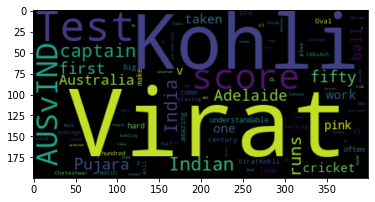

In [23]:
Words=' '.join(twets for twets in df['Tweets'])
WordCloud=WordCloud(collocations=False).generate(Words)
plt.imshow(WordCloud , interpolation="bilinear")
plt.show()

In [24]:
emotion=[]
for i in df["Analysis"]:
    if(i=="Negative"):
        emotion.append(0)
    elif(i=="Positive"):
        emotion.append(1)
    else:
        emotion.append(2)
y=[]
y.append(emotion.count(0))
y.append(emotion.count(1))
y.append(emotion.count(2))



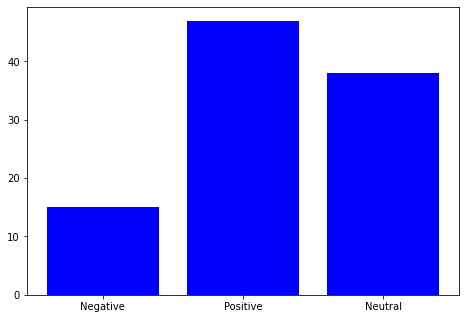

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
x=["Negative","Positive","Neutral"]
ax.bar(x,y,color='blue')
plt.show()

In [26]:
count=0
count1=0
count2=0
for i in df["Analysis"]:
    if(i=="Negative"):
        count=count+1
    elif(i=="Positive"):
        count1=count1+1
    else:
        count2=count2+1

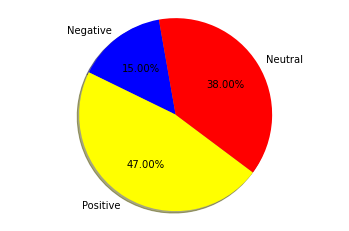

In [27]:
labels=['Negative','Positive','Neutral']
sizes=[count,count1,count2]
colors=['blue','yellow','red']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.2f%%',shadow=True,startangle=100)
plt.axis('equal')
plt.show()